In [2]:
import os

DATA_FOLDER = os.path.abspath(os.path.join('..', 'data'))
FIGURE_FOLDER = os.path.abspath(os.path.join('..', 'figures'))

notebook_name = '051_run_pep_keras_genomics'

data_folder = os.path.join(DATA_FOLDER, notebook_name)
figure_folder = os.path.join(FIGURE_FOLDER, notebook_name)

! mkdir -p $data_folder
! mkdir -p $figure_folder

input_folder = os.path.join(DATA_FOLDER, '023_make_train_valid_test_sets')

In [10]:
ls $DATA_FOLDER/001_amino_acid_encoding

molecular_weight.csv  side_chain_charge.csv  side_chain_polarity.csv
one_hot_encoding.csv  side_chain_class.csv


In [1]:
# from tensorflow.python.client import device_lib ; print(device_lib.list_local_devices())

### Keras-genomics wants mapping files that are tab-separated and have no headers

In [13]:
import glob
import pandas as pd

encoding_folder = os.path.join(DATA_FOLDER, '001_amino_acid_encoding')

for csv in glob.glob(os.path.join(encoding_folder, '*.csv')):
    basename = os.path.basename(csv)
    tsv = os.path.join(data_folder, basename.replace('csv', 'tsv'))
    df = pd.read_csv(csv)
    df.to_csv(tsv, sep='\t', header=False, index=False)
! head $data_folder/*tsv

==> /src/myhome/code/sequence-localization/data/051_run_pep_keras_genomics/molecular_weight.tsv <==
A	89.094
C	121.154
D	133.10399999999998
E	147.131
F	165.192
G	75.067
H	155.156
I	131.175
K	146.189
L	131.175

==> /src/myhome/code/sequence-localization/data/051_run_pep_keras_genomics/one_hot_encoding.tsv <==
A	1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0
C	0	1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0
D	0	0	1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0
E	0	0	0	1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0
F	0	0	0	0	1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0
G	0	0	0	0	0	1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0
H	0	0	0	0	0	0	1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0
I	0	0	0	0	0	0	0	1	0	0	0	0	0	0	0	0	0	0	0	0	0	0
K	0	0	0	0	0	0	0	0	1	0	0	0	0	0	0	0	0	0	0	0	0	0
L	0	0	0	0	0	0	0	0	0	1	0	0	0	0	0	0	0	0	0	0	0	0

==> /src/myhome/code/sequence-localization/data/051_run_pep_keras_genomics/side_chain_charge.tsv <==
A	0	1.0	0.0
C	0	1.0	0.0
D	1	0.0	0.0
E	1	0.0	0.0
F	0	1.0	0.0
G	0	1.0	0.0
H	0	0.9	0.1
I	0	1.0	0.0
K	0	0.0	1.0
L	0	1.0	0.0

==> /sr

In [67]:
import glob


mapperfiles = glob.glob(os.path.join(data_folder, '*tsv'))

dtypes = 'train', 'valid', 'test'
keras_genomics = '/src/myhome/code/Keras-genomics'

model = os.path.join(keras_genomics, 'example', 'model.py')

seqdata_prefix = 'Homo_sapiens.GRCh38.pep.all.fa.nuclear_or_cytoplasmic.last150'

for i, mapperfile in enumerate(mapperfiles):
    expt_n = str(i).zfill(2)
#     print(expt_n)
    mapper_prefix = os.path.basename(mapperfile).split('.tsv')[0]
    expt_dir = os.path.join(data_folder, f'pep_expt{expt_n}_{mapper_prefix}')
    print(expt_dir)
    for dtype in dtypes:
        print(f"--- Making {dtype} dataset ... ---")
        input_data = os.path.join(input_folder, f'{seqdata_prefix}.{dtype}')
        target = os.path.join(input_folder, f'{seqdata_prefix}.target.tsv.{dtype}')
        output = os.path.join(expt_dir, f'{dtype}.h5')
        ! python $keras_genomics/embedH5.py --mapperfile $mapperfile $input_data $target $output
    # Run the model
    ! python $keras_genomics/main.py -d $expt_dir -m $model -y -t -e --trainepoch 50

/src/myhome/code/sequence-localization/data/051_run_pep_keras_genomics/pep_expt00_side_chain_charge
--- Making train dataset ... ---
/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
args: Namespace(batch=5000, dataname='data', infile='/src/myhome/code/sequence-localization/data/023_make_train_valid_test_sets/Homo_sapiens.GRCh38.pep.all.fa.nuclear_or_cytoplasmic.last150.train', infile2='', isseq='Y', labelfile='/src/myhome/code/sequence-localization/data/023_make_train_valid_test_sets/Homo_sapiens.GRCh38.pep.all.fa.nuclear_or_cytoplasmic.last150.target.tsv.train', labelname='label', maniprefix='/data', mapperfile='/src/myhome/code/sequence-localization/data/051_run_pep_keras_genomics/side_chain_charge.tsv', outfile='/src/myhome/code/seq

6300/6300 [==============================] - 1s 115us/step - loss: 0.7110 - acc: 0.6113 - val_loss: 0.6763 - val_acc: 0.5944
Epoch 2/2
900/900 [==============================] - 0s 41us/step

2 seconds.

3 | Wed May 30 19:58:11 2018 | lowest loss so far: 0.6759 (run 2)

iterations: 2.2222222222222223
{'DELTA': 1e-08, 'DROPOUT': 0.5, 'MOMENT': 0.9}

Train on 6300 samples, validate on 900 samples
Epoch 1/2
6300/6300 [==============================] - 1s 128us/step - loss: 0.6722 - acc: 0.6146 - val_loss: 0.6759 - val_acc: 0.5944
Epoch 2/2
900/900 [==============================] - 0s 50us/step

2 seconds.

4 | Wed May 30 19:58:12 2018 | lowest loss so far: 0.6731 (run 3)

iterations: 2.2222222222222223
{'DELTA': 0.0001, 'DROPOUT': 0.1, 'MOMENT': 0.99}

Train on 6300 samples, validate on 900 samples
Epoch 1/2
6300/6300 [==============================] - 1s 135us/step - loss: 0.7738 - acc: 0.6081 - val_loss: 0.6768 - val_acc: 0.5944
Epoch 2/2
900/900 [==============================] - 0s 5

6300/6300 [==============================] - 1s 198us/step - loss: 0.7632 - acc: 0.6089 - val_loss: 0.6778 - val_acc: 0.5944
Epoch 2/7
6300/6300 [==============================] - 0s 62us/step - loss: 0.6645 - acc: 0.6200 - val_loss: 0.6761 - val_acc: 0.5944
Epoch 3/7
6300/6300 [==============================] - 0s 60us/step - loss: 0.6634 - acc: 0.6200 - val_loss: 0.6758 - val_acc: 0.5944
Epoch 4/7
6300/6300 [==============================] - 0s 60us/step - loss: 0.6624 - acc: 0.6200 - val_loss: 0.6770 - val_acc: 0.5944
Epoch 5/7
6300/6300 [==============================] - 0s 60us/step - loss: 0.6584 - acc: 0.6200 - val_loss: 0.6783 - val_acc: 0.5944
Epoch 6/7
6300/6300 [==============================] - 0s 60us/step - loss: 0.6552 - acc: 0.6200 - val_loss: 0.6755 - val_acc: 0.5944
Epoch 7/7
900/900 [==============================] - 0s 59us/step

4 seconds.

15 | Wed May 30 19:58:43 2018 | lowest loss so far: 0.6731 (run 3)

iterations: 6.666666666666666
{'DELTA': 1e-08, 'DROPOUT': 

6300/6300 [==============================] - 0s 68us/step - loss: 0.6046 - categorical_accuracy: 0.6705 - val_loss: 0.6814 - val_categorical_accuracy: 0.5789

Epoch 00014: val_loss did not improve from 0.67427
Epoch 15/50
6300/6300 [==============================] - 0s 70us/step - loss: 0.5962 - categorical_accuracy: 0.6798 - val_loss: 0.6877 - val_categorical_accuracy: 0.5889

Epoch 00015: val_loss did not improve from 0.67427
Epoch 16/50
6300/6300 [==============================] - 0s 69us/step - loss: 0.5869 - categorical_accuracy: 0.6903 - val_loss: 0.6921 - val_categorical_accuracy: 0.5344

Epoch 00016: val_loss did not improve from 0.67427
Epoch 17/50
6300/6300 [==============================] - 0s 67us/step - loss: 0.5787 - categorical_accuracy: 0.6943 - val_loss: 0.6878 - val_categorical_accuracy: 0.5644

Epoch 00017: val_loss did not improve from 0.67427
Test AUC for output neuron 0: 0.49130235394051824
Test categorical accuracy: 0.6144444444444445
/src/myhome/code/sequence-lo

2018-05-30 19:59:23.147831: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1053] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:3 with 11364 MB memory) -> physical GPU (device: 3, name: TITAN Xp, pci bus id: 0000:84:00.0, compute capability: 6.1)
6300/6300 [==============================] - 5s 859us/step - loss: 8.4901 - acc: 0.4530 - val_loss: 9.5813 - val_acc: 0.4056
Epoch 2/2
900/900 [==============================] - 0s 48us/step

6 seconds.

2 | Wed May 30 19:59:25 2018 | lowest loss so far: 9.5813 (run 1)

iterations: 2.2222222222222223
{'DELTA': 1e-06, 'DROPOUT': 0.75, 'MOMENT': 0.999}

Train on 6300 samples, validate on 900 samples
Epoch 1/2
6300/6300 [==============================] - 1s 143us/step - loss: 6.3541 - acc: 0.5760 - val_loss: 6.5368 - val_acc: 0.5944
Epoch 2/2
900/900 [==============================] - 0s 51us/step

2 seconds.

3 | Wed May 30 19:59:27 2018 | lowest loss so far: 6.5368 (run 2)

iterations: 2.2222222222222223
{'DELTA': 0.0

Train on 6300 samples, validate on 900 samples
Epoch 1/7
6300/6300 [==============================] - 1s 233us/step - loss: 6.5604 - acc: 0.5881 - val_loss: 6.5368 - val_acc: 0.5944
Epoch 2/7
6300/6300 [==============================] - 0s 63us/step - loss: 6.1351 - acc: 0.6194 - val_loss: 6.5368 - val_acc: 0.5944
Epoch 3/7
6300/6300 [==============================] - 0s 63us/step - loss: 6.1359 - acc: 0.6190 - val_loss: 6.5368 - val_acc: 0.5944
Epoch 4/7
900/900 [==============================] - 0s 64us/step

4 seconds.

15 | Wed May 30 19:59:59 2018 | lowest loss so far: 6.5368 (run 2)

iterations: 6.666666666666666
{'DELTA': 0.0001, 'DROPOUT': 0.1, 'MOMENT': 0.999}

Train on 6300 samples, validate on 900 samples
Epoch 1/7
6300/6300 [==============================] - 1s 236us/step - loss: 9.9280 - acc: 0.3806 - val_loss: 9.5813 - val_acc: 0.4056
Epoch 2/7
6300/6300 [==============================] - 0s 65us/step - loss: 9.9932 - acc: 0.3800 - val_loss: 9.5813 - val_acc: 0.4056
Epoch

batch_array.shape - before slicing (5000,)
batch_array.shape - after slicing (900,)
target.shape (900, 2)
seqs.shape (900, 2)
data shape:  (900, 4, 1, 150)
--- Making test dataset ... ---
/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
args: Namespace(batch=5000, dataname='data', infile='/src/myhome/code/sequence-localization/data/023_make_train_valid_test_sets/Homo_sapiens.GRCh38.pep.all.fa.nuclear_or_cytoplasmic.last150.test', infile2='', isseq='Y', labelfile='/src/myhome/code/sequence-localization/data/023_make_train_valid_test_sets/Homo_sapiens.GRCh38.pep.all.fa.nuclear_or_cytoplasmic.last150.target.tsv.test', labelname='label', maniprefix='/data', mapperfile='/src/myhome/code/sequence-localization/data/051_run_pep_keras_genomics/

900/900 [==============================] - 0s 61us/step

2 seconds.

7 | Wed May 30 20:00:47 2018 | lowest loss so far: 0.6754 (run 5)

iterations: 2.2222222222222223
{'DELTA': 0.0001, 'DROPOUT': 0.1, 'MOMENT': 0.999}

Train on 6300 samples, validate on 900 samples
Epoch 1/2
6300/6300 [==============================] - 1s 185us/step - loss: 0.6798 - acc: 0.6146 - val_loss: 0.6779 - val_acc: 0.5944
Epoch 2/2
900/900 [==============================] - 0s 63us/step

2 seconds.

8 | Wed May 30 20:00:50 2018 | lowest loss so far: 0.6754 (run 5)

iterations: 2.2222222222222223
{'DELTA': 1e-08, 'DROPOUT': 0.75, 'MOMENT': 0.999}

Train on 6300 samples, validate on 900 samples
Epoch 1/2
6300/6300 [==============================] - 1s 194us/step - loss: 0.6798 - acc: 0.6094 - val_loss: 0.6768 - val_acc: 0.5944
Epoch 2/2
900/900 [==============================] - 0s 62us/step

2 seconds.

9 | Wed May 30 20:00:52 2018 | lowest loss so far: 0.6754 (run 5)

iterations: 2.2222222222222223
{'DELTA': 0

900/900 [==============================] - 0s 64us/step

5 seconds.

16 | Wed May 30 20:01:20 2018 | lowest loss so far: 0.6754 (run 5)

iterations: 6.666666666666666
{'DELTA': 1e-08, 'DROPOUT': 0.75, 'MOMENT': 0.9}

Train on 6300 samples, validate on 900 samples
Epoch 1/7
6300/6300 [==============================] - 2s 256us/step - loss: 0.6821 - acc: 0.5935 - val_loss: 0.6747 - val_acc: 0.5944
Epoch 2/7
6300/6300 [==============================] - 0s 60us/step - loss: 0.6738 - acc: 0.6167 - val_loss: 0.6755 - val_acc: 0.5944
Epoch 3/7
6300/6300 [==============================] - 0s 59us/step - loss: 0.6668 - acc: 0.6186 - val_loss: 0.6769 - val_acc: 0.5944
Epoch 4/7
900/900 [==============================] - 0s 68us/step

4 seconds.

17 | Wed May 30 20:01:24 2018 | lowest loss so far: 0.6754 (run 5)

iterations: 6.666666666666666
{'DELTA': 1e-08, 'DROPOUT': 0.75, 'MOMENT': 0.99}

Train on 6300 samples, validate on 900 samples
Epoch 1/7
6300/6300 [==============================] - 2s 

batch_array.shape - before slicing (5000,)
batch_array.shape - after slicing (900,)
target.shape (900, 2)
seqs.shape (900, 2)
data shape:  (900, 22, 1, 150)
--- Making test dataset ... ---
/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
args: Namespace(batch=5000, dataname='data', infile='/src/myhome/code/sequence-localization/data/023_make_train_valid_test_sets/Homo_sapiens.GRCh38.pep.all.fa.nuclear_or_cytoplasmic.last150.test', infile2='', isseq='Y', labelfile='/src/myhome/code/sequence-localization/data/023_make_train_valid_test_sets/Homo_sapiens.GRCh38.pep.all.fa.nuclear_or_cytoplasmic.last150.target.tsv.test', labelname='label', maniprefix='/data', mapperfile='/src/myhome/code/sequence-localization/data/051_run_pep_keras_genomics

900/900 [==============================] - 0s 75us/step

3 seconds.

7 | Wed May 30 20:02:11 2018 | lowest loss so far: 0.6733 (run 6)

iterations: 2.2222222222222223
{'DELTA': 0.0001, 'DROPOUT': 0.1, 'MOMENT': 0.999}

Train on 6300 samples, validate on 900 samples
Epoch 1/2
6300/6300 [==============================] - 1s 199us/step - loss: 0.6700 - acc: 0.6171 - val_loss: 0.6751 - val_acc: 0.5944
Epoch 2/2
900/900 [==============================] - 0s 74us/step

3 seconds.

8 | Wed May 30 20:02:14 2018 | lowest loss so far: 0.6733 (run 6)

iterations: 2.2222222222222223
{'DELTA': 1e-08, 'DROPOUT': 0.5, 'MOMENT': 0.999}

Train on 6300 samples, validate on 900 samples
Epoch 1/2
6300/6300 [==============================] - 1s 215us/step - loss: 0.6740 - acc: 0.6143 - val_loss: 0.6754 - val_acc: 0.5944
Epoch 2/2
900/900 [==============================] - 0s 80us/step

3 seconds.

9 | Wed May 30 20:02:17 2018 | lowest loss so far: 0.6733 (run 6)

iterations: 2.2222222222222223
{'DELTA': 0.

Train on 6300 samples, validate on 900 samples
Epoch 1/7
6300/6300 [==============================] - 2s 273us/step - loss: 0.6691 - acc: 0.6152 - val_loss: 0.6793 - val_acc: 0.5944
Epoch 2/7
6300/6300 [==============================] - 1s 85us/step - loss: 0.6647 - acc: 0.6200 - val_loss: 0.6762 - val_acc: 0.5944
Epoch 3/7
6300/6300 [==============================] - 1s 88us/step - loss: 0.6644 - acc: 0.6200 - val_loss: 0.6770 - val_acc: 0.5944
Epoch 4/7
6300/6300 [==============================] - 1s 87us/step - loss: 0.6649 - acc: 0.6192 - val_loss: 0.6769 - val_acc: 0.5944
Epoch 5/7
900/900 [==============================] - 0s 85us/step

5 seconds.

17 | Wed May 30 20:02:54 2018 | lowest loss so far: 0.6725 (run 12)

iterations: 6.666666666666666
{'DELTA': 1e-06, 'DROPOUT': 0.1, 'MOMENT': 0.9}

Train on 6300 samples, validate on 900 samples
Epoch 1/7
6300/6300 [==============================] - 2s 276us/step - loss: 0.6695 - acc: 0.6173 - val_loss: 0.6788 - val_acc: 0.5944
Epoch 2

batch_array.shape - before slicing (5000,)
batch_array.shape - after slicing (1800,)
target.shape (1800, 2)
seqs.shape (1800, 2)
data shape:  (1800, 10, 1, 150)
/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
Reading /src/myhome/code/sequence-localization/data/051_run_pep_keras_genomics/pep_expt04_side_chain_class/train.h5.batch1 ...
Reading /src/myhome/code/sequence-localization/data/051_run_pep_keras_genomics/pep_expt04_side_chain_class/train.h5.batch2 ...
Reading /src/myhome/code/sequence-localization/data/051_run_pep_keras_genomics/pep_expt04_side_chain_class/valid.h5.batch1 ...

*** 9 configurations x 2.2 iterations each

1 | Wed May 30 20:03:22 2018 | lowest loss so far: inf (run -1)

iterations: 2.2222

900/900 [==============================] - 0s 67us/step

2 seconds.

9 | Wed May 30 20:03:45 2018 | lowest loss so far: 0.6732 (run 1)

iterations: 2.2222222222222223
{'DELTA': 1e-06, 'DROPOUT': 0.5, 'MOMENT': 0.9}

Train on 6300 samples, validate on 900 samples
Epoch 1/2
6300/6300 [==============================] - 1s 210us/step - loss: 0.6725 - acc: 0.6151 - val_loss: 0.6748 - val_acc: 0.5944
Epoch 2/2
900/900 [==============================] - 0s 68us/step

3 seconds.

*** 3.0 configurations x 6.7 iterations each

10 | Wed May 30 20:03:47 2018 | lowest loss so far: 0.6732 (run 1)

iterations: 6.666666666666667
{'DELTA': 1e-08, 'DROPOUT': 0.5, 'MOMENT': 0.9}

Train on 6300 samples, validate on 900 samples
Epoch 1/7
6300/6300 [==============================] - 1s 201us/step - loss: 0.6740 - acc: 0.5951 - val_loss: 0.6748 - val_acc: 0.5944
Epoch 2/7
6300/6300 [==============================] - 0s 71us/step - loss: 0.6670 - acc: 0.6183 - val_loss: 0.6740 - val_acc: 0.5944
Epoch 3/7
6300

6300/6300 [==============================] - 2s 258us/step - loss: 0.6725 - acc: 0.6144 - val_loss: 0.6759 - val_acc: 0.5944
Epoch 2/7
6300/6300 [==============================] - 0s 73us/step - loss: 0.6641 - acc: 0.6200 - val_loss: 0.6819 - val_acc: 0.5944
Epoch 3/7
6300/6300 [==============================] - 0s 76us/step - loss: 0.6645 - acc: 0.6200 - val_loss: 0.6765 - val_acc: 0.5944
Epoch 4/7
6300/6300 [==============================] - 0s 66us/step - loss: 0.6634 - acc: 0.6202 - val_loss: 0.6757 - val_acc: 0.5944
Epoch 5/7
6300/6300 [==============================] - 0s 77us/step - loss: 0.6632 - acc: 0.6200 - val_loss: 0.6791 - val_acc: 0.5944
Epoch 6/7
6300/6300 [==============================] - 0s 74us/step - loss: 0.6625 - acc: 0.6170 - val_loss: 0.6753 - val_acc: 0.5944
Epoch 7/7
900/900 [==============================] - 0s 75us/step

5 seconds.
{'DELTA': 1e-08, 'DROPOUT': 0.5, 'MOMENT': 0.9}
Reading /src/myhome/code/sequence-localization/data/051_run_pep_keras_genomics/

In [49]:
! ls $data_folder/*expt*

/src/myhome/code/sequence-localization/data/051_run_pep_keras_genomics/pep_expt00_side_chain_charge:
model		test.txt	 train.h5.batch2  valid.h5.batch1
test.h5.batch1	train.h5.batch1  train.txt	  valid.txt

/src/myhome/code/sequence-localization/data/051_run_pep_keras_genomics/pep_expt01:
model		test.txt	 train.h5.batch2  valid.h5.batch1
test.h5.batch1	train.h5.batch1  train.txt	  valid.txt

/src/myhome/code/sequence-localization/data/051_run_pep_keras_genomics/pep_expt01_molecular_weight:
model		test.txt	 train.h5.batch2  valid.h5.batch1
test.h5.batch1	train.h5.batch1  train.txt	  valid.txt

/src/myhome/code/sequence-localization/data/051_run_pep_keras_genomics/pep_expt02_side_chain_polarity:
model		test.txt	 train.h5.batch2  valid.h5.batch1
test.h5.batch1	train.h5.batch1  train.txt	  valid.txt

/src/myhome/code/sequence-localization/data/051_run_pep_keras_genomics/pep_expt03_one_hot_encoding:
model		test.txt	 train.h5.batch2  valid.h5.batch1
test.h5.batch1	train.h5.batch1  train.txt	 

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

experiments = glob.glob(os.path.join(data_folder, '*expt*'))

dfs = []

for experiment in experiments:

    txt = os.path.join(experiment, 'model', 'model.training_history.txt')
    ! ls $txt
    df = pd.read_table(txt)
    df.columns = df.columns.str.strip('# ')
    print(df.shape)
    df.head()

    reset_index = df.reset_index()
    reset_index = reset_index.rename(columns={'index': 'epoch'})
    reset_index.head()

    tidy = pd.melt(reset_index, id_vars='epoch')
    print(tidy.shape)
    tidy.head()
    
    amino_acid_encoding = '_'.join(os.path.basename(experiment).split('_')[2:])
    print(f'amino_acid_encoding: {amino_acid_encoding}')
    
    tidy['amino_acid_encoding'] = amino_acid_encoding
    dfs.append(tidy)
training_history = pd.concat(dfs, ignore_index=True)

/src/myhome/code/sequence-localization/data/051_run_pep_keras_genomics/pep_expt03_one_hot_encoding/model/model.training_history.txt
(12, 4)
(48, 3)
amino_acid_encoding: one_hot_encoding
/src/myhome/code/sequence-localization/data/051_run_pep_keras_genomics/pep_expt02_side_chain_polarity/model/model.training_history.txt
(15, 4)
(60, 3)
amino_acid_encoding: side_chain_polarity
/src/myhome/code/sequence-localization/data/051_run_pep_keras_genomics/pep_expt01_molecular_weight/model/model.training_history.txt
(11, 4)
(44, 3)
amino_acid_encoding: molecular_weight
/src/myhome/code/sequence-localization/data/051_run_pep_keras_genomics/pep_expt00_side_chain_charge/model/model.training_history.txt
(17, 4)
(68, 3)
amino_acid_encoding: side_chain_charge
/src/myhome/code/sequence-localization/data/051_run_pep_keras_genomics/pep_expt04_side_chain_class/model/model.training_history.txt
(18, 4)
(72, 3)
amino_acid_encoding: side_chain_class


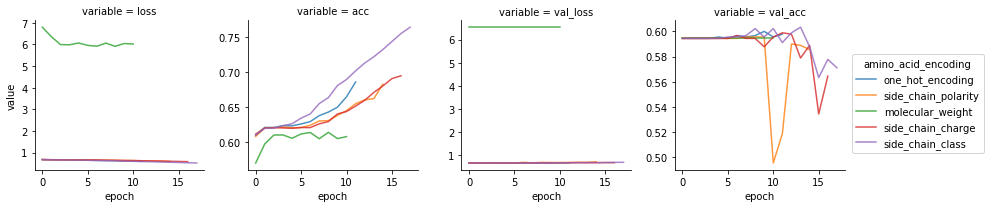

In [70]:
g = sns.FacetGrid(data=training_history, col='variable', hue='amino_acid_encoding', sharey=False)
g.map(plt.plot, 'epoch', 'value', alpha=0.8)
# g.set(ylim=(.4, 1), xlim=(0, 20))
g.add_legend()

svg = os.path.join(figure_folder, 'training_history.svg')
g.savefig(svg)

png = os.path.join(figure_folder, 'training_history.png')
g.savefig(png, dpi=300)

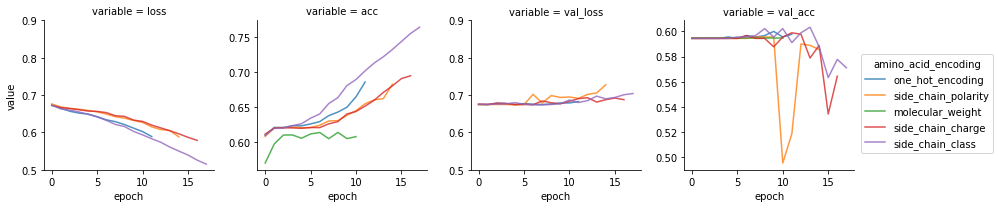

In [72]:
g = sns.FacetGrid(data=training_history, col='variable', hue='amino_acid_encoding', sharey=False)
g.map(plt.plot, 'epoch', 'value', alpha=0.8)
# g.set(ylim=(.4, 1), xlim=(0, 20))
for ax in g.axes.flat:
    if 'loss' in ax.get_title():
        ax.set(ylim=(.5, .9))
g.add_legend()
        
svg = os.path.join(figure_folder, 'training_history_zoom_loss.svg')
g.savefig(svg)

png = os.path.join(figure_folder, 'training_history_zoom_loss.png')
g.savefig(png, dpi=300)